# Load required libraries

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
AEdata = pd.read_csv("cleaned_AE_data.csv")

In [5]:
AEdata['Period'] = pd.to_datetime(AEdata['Period'])

In [6]:
AEdata = AEdata.set_index('Period')

In [7]:
Emergency_admissions = AEdata['Total Emergency Admissions']

## 1. Split main dataset into Train Validation and Hold subsets of data
## Train (70%, 84), Validation (20%, 24), Hold (10%, 12). Total rows 120

In [8]:
# Training dataset (70%, 84)
traindata = Emergency_admissions.iloc[0:84]

In [9]:
# Validation dataset (20%, 24)
valdata = Emergency_admissions.iloc[83:108]

In [10]:
# Hold dataset (10%, 12)
hold = Emergency_admissions[107:115]

In [11]:
traindataf = traindata.to_frame().apply(np.int64)

In [12]:
# Renmae variable now as a dataframe
traindataf.rename(columns={'Total Emergency Admissions':'Emadmissions'})

,Emadmissions
Period,
2010-08-01,425702
2010-09-01,424900
2010-10-01,436215
2010-11-01,429099
2010-12-01,452728
...,...
2017-03-01,509805
2017-04-01,471328
2017-05-01,505843


In [13]:
valdataf = valdata.to_frame().apply(np.int64)

In [14]:
valdataf.rename(columns={'Total Emergency Admissions':'Emadmissions'})

,Emadmissions
Period,
2017-07-01,499259
2017-08-01,486074
2017-09-01,486799
2017-10-01,513217
2017-11-01,513019
2017-12-01,520803
2018-01-01,526045
2018-02-01,476867
2018-03-01,526066


In [15]:
holdf = hold.to_frame().apply(np.int64)

In [16]:
holdf.rename(columns={'Total Emergency Admissions':'Emadmissions'})

,Emadmissions
Period,
2019-07-01,554069
2019-08-01,529231
2019-09-01,529903
2019-10-01,563133
2019-11-01,559556
2019-12-01,560795
2020-01-01,559058
2020-02-01,510811


In [17]:
## 2. Combine Train and Validation datasets data 

In [18]:
Trainval = traindataf.append(valdataf,ignore_index=True)

## 3 Plot all three datasets Train, Validation and hold datasets 

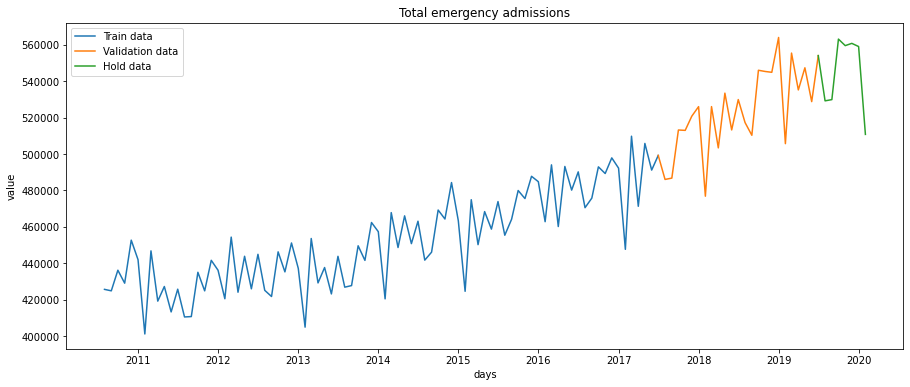

In [115]:
plt.figure(figsize=(15,6))
plt.title('Total emergency admissions')
plt.plot(traindataf, label = "Train data")
plt.plot(valdataf, label = "Validation data")
plt.plot(holdf, label = "Hold data")
plt.legend()
plt.ylabel("value")
plt.xlabel("days")
plt.show()

## 4 Data preparation for the Neural Network 

### Scale the data 

#### We need to scale the data using the MinMaxScaler() 

In [116]:
from sklearn.preprocessing import MinMaxScaler

In [117]:
# The dataset will be scaled between 0  and 1 
# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0,1))

###  4.1The MinMaxScaler function must be aaplied on a DataFrame.

#### 4.1.1 Train datasets:  It expects a 2d object 
#### traindataf is allready a Pandas Dataframe

In [118]:
Traindata = scaler.fit_transform(traindataf)

#### 4.2 Once the dataset has been scaled we need to turn it back into a Series object for the Network model build

In [119]:
flat_Traindata = Traindata.flatten()

In [120]:
Traindata_scaled = pd.Series(flat_Traindata,
                            index=traindataf.index)

In [121]:
#### 1-2 Target dataset 

In [ ]:
total_lags = 5

###  4.3 Build Target and Features datasets based on Traindata_scaled dataset 

#### 1-2 Target dataset 

In [122]:
Y_train = Traindata_scaled.iloc[5:,]

#### 2-2 Features dataset from Traindata_scaled dataset 

In [123]:
def get_features(data,total_lags):
    col_list=[]
    for time_lag in range(total_lags):
        Lag_i = pd.DataFrame(data.shift(time_lag+1,axis=0,fill_value=0))
        col_list.append(Lag_i)
    features_array = pd.concat(col_list,axis=1)
    trunc_dataset = features_array.iloc[total_lags:]
    return trunc_dataset

In [124]:
X_train = get_features(Traindata_scaled,total_lags)

In [125]:
new_cols = ['0','1','2','3','4']

In [126]:
X_train.columns = new_cols

In [127]:
X_train

,0,1,2,3,4
Period,,,,,
2011-01-01,0.474424,0.256844,0.322369,0.218179,0.225564
2011-02-01,0.375666,0.474424,0.256844,0.322369,0.218179
2011-03-01,0.000000,0.375666,0.474424,0.256844,0.322369
2011-04-01,0.420252,0.000000,0.375666,0.474424,0.256844
2011-05-01,0.166088,0.420252,0.000000,0.375666,0.474424
...,...,...,...,...,...
2017-03-01,0.428015,0.838562,0.890515,0.811426,0.845100
2017-04-01,1.000000,0.428015,0.838562,0.890515,0.811426
2017-05-01,0.645697,1.000000,0.428015,0.838562,0.890515


#### 2-2 Validation dataset 

In [128]:
Valdata = scaler.fit_transform(valdataf)

In [129]:
flat_Valdata = Valdata.flatten()

In [130]:
Valdata_scaled = pd.Series(flat_Valdata,
                            index=valdataf.index)

In [131]:
### Use ad-hoc function to lag original  Validation ataset 

In [132]:
Y_val = Valdata_scaled.iloc[5:,]

In [133]:
X_val = get_features(Valdata_scaled,total_lags)

In [134]:
X_val

,0,0,0,0,0
Period,,,,,
2017-12-01,0.414739,0.417011,0.113941,0.105624,0.256883
2018-01-01,0.504038,0.414739,0.417011,0.113941,0.105624
2018-02-01,0.564175,0.504038,0.414739,0.417011,0.113941
2018-03-01,0.000000,0.564175,0.504038,0.414739,0.417011
2018-04-01,0.564416,0.000000,0.564175,0.504038,0.414739
2018-05-01,0.304309,0.564416,0.000000,0.564175,0.504038
2018-06-01,0.649206,0.304309,0.564416,0.000000,0.564175
2018-07-01,0.417435,0.649206,0.304309,0.564416,0.000000
2018-08-01,0.608767,0.417435,0.649206,0.304309,0.564416


In [135]:
new_cols_val = ['0','1','2','3','4']

In [136]:
X_val.columns = new_cols_val

In [137]:
X_val

,0,1,2,3,4
Period,,,,,
2017-12-01,0.414739,0.417011,0.113941,0.105624,0.256883
2018-01-01,0.504038,0.414739,0.417011,0.113941,0.105624
2018-02-01,0.564175,0.504038,0.414739,0.417011,0.113941
2018-03-01,0.000000,0.564175,0.504038,0.414739,0.417011
2018-04-01,0.564416,0.000000,0.564175,0.504038,0.414739
2018-05-01,0.304309,0.564416,0.000000,0.564175,0.504038
2018-06-01,0.649206,0.304309,0.564416,0.000000,0.564175
2018-07-01,0.417435,0.649206,0.304309,0.564416,0.000000
2018-08-01,0.608767,0.417435,0.649206,0.304309,0.564416


### 5. Build a Dense Neural Network

In [138]:
### Layers stacked in a Dense function 

In [139]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [140]:
#### 5.1. We initialise the model using Sequential()

In [141]:
## Model 1 > Specs: 2 Layer fully-connected feed-forward neural network

### 5.1  Specify Neural Network architecture

In [142]:
model = Sequential()
model.add(Dense(5, input_dim=5, activation='relu'))
model.add(Dense(1,activation="linear"))

In [143]:
### 5.2 Display model Summary 

In [144]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 6         
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________


### 5.2 Compile the model 

In [145]:
## Then we compile the keras model
# Model compile step specifies the loss function and the optimizer to use 
model.compile(loss='mean_squared_error',optimizer='adam')

### 5.3 Train and evaluate the model 

In [146]:
# fit the keras model on the dataset
history = model.fit(X_train, Y_train, epochs=1000,
                    validation_data=(X_val,Y_val))

Train on 79 samples, validate on 20 samples
Epoch 1/1000
79/79 [==============================] - 0s 2ms/sample - loss: 0.1374 - val_loss: 0.1980
Epoch 2/1000
79/79 [==============================] - 0s 49us/sample - loss: 0.1213 - val_loss: 0.1807
Epoch 3/1000
79/79 [==============================] - 0s 201us/sample - loss: 0.1074 - val_loss: 0.1666
Epoch 4/1000
79/79 [==============================] - 0s 45us/sample - loss: 0.0950 - val_loss: 0.1554
Epoch 5/1000
79/79 [==============================] - 0s 47us/sample - loss: 0.0862 - val_loss: 0.1469
Epoch 6/1000
79/79 [==============================] - 0s 53us/sample - loss: 0.0798 - val_loss: 0.1409
Epoch 7/1000
79/79 [==============================] - 0s 50us/sample - loss: 0.0750 - val_loss: 0.1369
Epoch 8/1000
79/79 [==============================] - 0s 51us/sample - loss: 0.0720 - val_loss: 0.1345
Epoch 9/1000
79/79 [==============================] - 0s 49us/sample - loss: 0.0699 - val_loss: 0.1331
Epoch 10/1000
79/79 [========

### 5.4 Display training parameters 

In [147]:
#### When we run the fit() function, it creates a History object containing the training parameters (history.params). 

In [148]:
### fit() : Training parameters (history.params)
### fit() : The list of epochs it went through (history.epoch)
##  fit() : It contains a dictionary (history.history) containing the loss and extra metrics it measured at the end of each epoch 

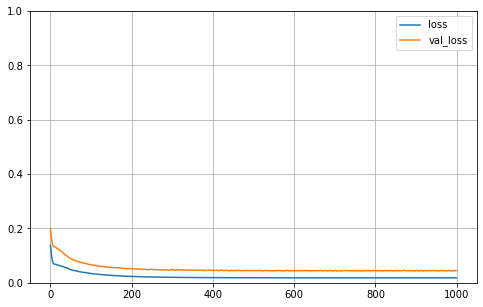

In [149]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # This sets vertical range to [0-1]
plt.show()

### 5.5 make some predictions with the model 

In [150]:
predictions = model.predict(X_val)

In [151]:
predictions

array([[0.29472557],
       [0.27367154],
       [0.35140052],
       [0.47059956],
       [0.3067308 ],
       [0.41258344],
       [0.40365922],
       [0.375188  ],
       [0.50256866],
       [0.50063664],
       [0.57159966],
       [0.44649774],
       [0.6434668 ],
       [0.62752527],
       [0.6444914 ],
       [0.885089  ],
       [0.6567399 ],
       [0.82373834],
       [0.79278415],
       [0.65052587]], dtype=float32)

In [152]:
type(predictions)

numpy.ndarray

In [153]:
# Unscale the data 

In [157]:
predictions_unscaled=scaler.inverse_transform(predictions)

In [158]:
predictions_unscaled

array([[502557.62],
       [500722.4 ],
       [507497.88],
       [517888.25],
       [503604.12],
       [512831.06],
       [512053.2 ],
       [509571.38],
       [520674.9 ],
       [520506.5 ],
       [526692.2 ],
       [515787.28],
       [532956.7 ],
       [531567.1 ],
       [533046.  ],
       [554018.44],
       [534113.7 ],
       [548670.6 ],
       [545972.44],
       [533572.  ]], dtype=float32)

In [165]:
predictions_unscaled.shape

(20, 1)

In [166]:
# Flatten predictions
predictions_flat = predictions_unscaled.flatten()

In [167]:
predictions_flat.shape

(20,)

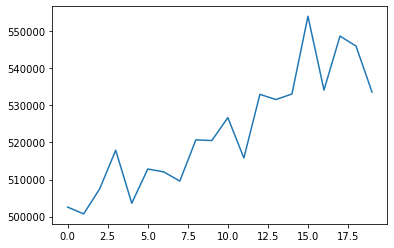

In [159]:
# Plot the unscaled predictions
plt.plot(predictions_unscaled)

In [ ]:
len(predictions_unscaled)

In [184]:
# I need to find the right Indext ()
len(valdataf)

25

In [185]:
predictions_unscaled2 = pd.Series(predictions_flat, 
                                 # index=valdataf.index[5:])
                                index=valdataf.index[0:20])

In [186]:
forecastNEURAL = pd.Series(predictions_unscaled2, index = X_val.index)

In [ ]:
# plt.title('2 Layer fully-connected feed-forward neural network')

In [206]:
forecastNEURAL_rename = forecastNEURAL.rename('Training Neural Network forecast')

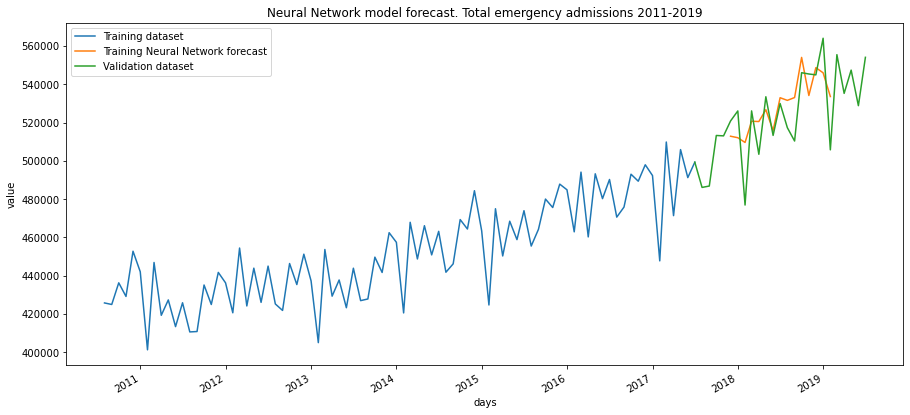

In [209]:
plt.figure(figsize=(15,7))
plt.title('Neural Network model forecast. Total emergency admissions 2011-2019')
plt.plot(traindataf, label = "Training dataset")  # Dataset 
forecastNEURAL_rename.plot() # Series 
plt.plot(valdataf, label = "Validation dataset") # Dataset
plt.legend()
plt.ylabel("value")
plt.xlabel("days")
plt.show()

### 5. Compute MAPE value

In [197]:
type(valdataf)

pandas.core.frame.DataFrame

In [198]:
type(forecastNEURAL)

pandas.core.series.Series

In [199]:
ValdataNEW = valdataf.rename(columns={'Total Emergency Admissions':'Value'})

In [200]:
fNEURALNETdataframe = pd.DataFrame(forecastNEURAL)

In [201]:
ForecastNEW = fNEURALNETdataframe.rename(columns={0:'Value'})

### 5.1 MAPE value for Neural Network model

In [210]:
def accuray_MAPE(ACT,FCAST):
  #  Value = abs((ACT-FCAST)/ACT).sum()/len(ACT)
    Value_percent = (abs((ACT-FCAST)/ACT).sum()/len(ACT))*100
    Mape_value = print(f"Neural Network model MAPE percent   {Value_percent}")
    #Mape_value_per = print(f"Seasonal ARIMA model MAPE {Value}")
    return Value_percent

In [211]:
accuray_MAPE(ValdataNEW,ForecastNEW)

Neural Network model MAPE percent   Value    1.517742
dtype: float64


Value    1.517742
dtype: float64